In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


In [40]:
df = pd.read_csv('corn_yield.csv')
df

,Year,Bushels Per Acre,PRCP,TAVG,TMAX,TMIN
0,2022,165.0,47.22,57.5,67.9,47.0
1,2021,175.0,40.82,58.7,68.8,48.7
2,2020,155.0,57.39,58.7,68.4,49.0
3,2019,161.0,38.15,58.0,68.0,48.1
4,2018,146.0,71.84,56.7,65.9,47.5
...,...,...,...,...,...,...
77,1944,35.3,40.05,56.2,64.7,47.7
78,1943,26.0,34.95,55.9,64.7,47.1
79,1942,36.0,43.48,56.5,65.2,47.9
80,1941,35.0,31.63,56.9,66.6,47.2


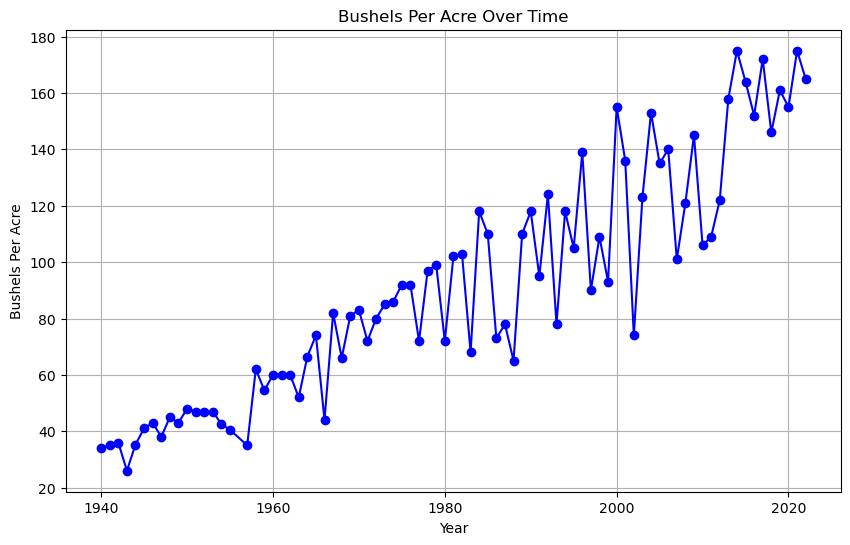

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Bushels Per Acre'], marker='o', linestyle='-', color='b')
plt.title('Bushels Per Acre Over Time')
plt.xlabel('Year')
plt.ylabel('Bushels Per Acre')
plt.grid(True)
plt.show()

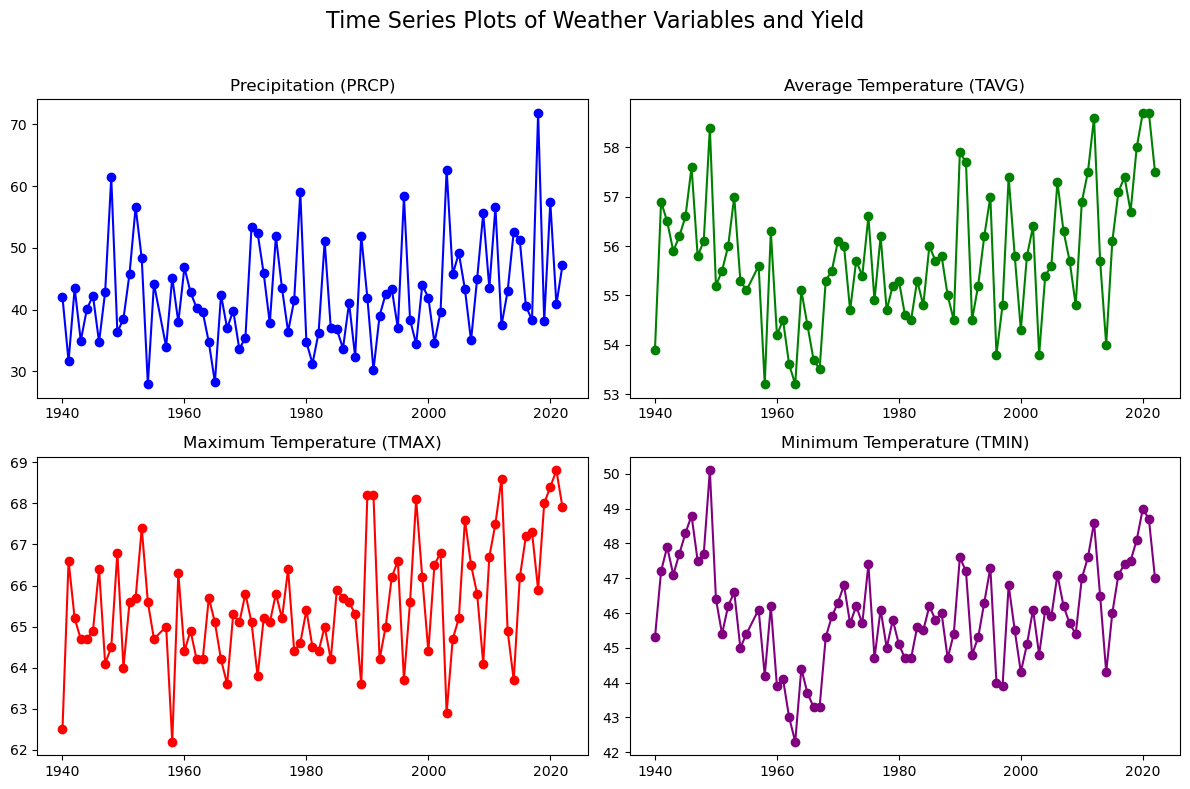

In [48]:
# Set the 'Year' column as the index 
df.set_index('Year', inplace=True)

# Plot time series for each variable
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Time Series Plots of Weather Variables and Yield', fontsize=16)

# Plot Precipitation (PRCP)
axes[0, 0].plot(df['PRCP'], marker='o', linestyle='-', color='b')
axes[0, 0].set_title('Precipitation (PRCP)')

# Plot Average Temperature (TAVG)
axes[0, 1].plot(df['TAVG'], marker='o', linestyle='-', color='g')
axes[0, 1].set_title('Average Temperature (TAVG)')

# Plot Maximum Temperature (TMAX)
axes[1, 0].plot(df['TMAX'], marker='o', linestyle='-', color='r')
axes[1, 0].set_title('Maximum Temperature (TMAX)')

# Plot Minimum Temperature (TMIN)
axes[1, 1].plot(df['TMIN'], marker='o', linestyle='-', color='purple')
axes[1, 1].set_title('Minimum Temperature (TMIN)')

# Adjust layout for better readability
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plots
plt.show()

## Correlation between Weather variables and Yield

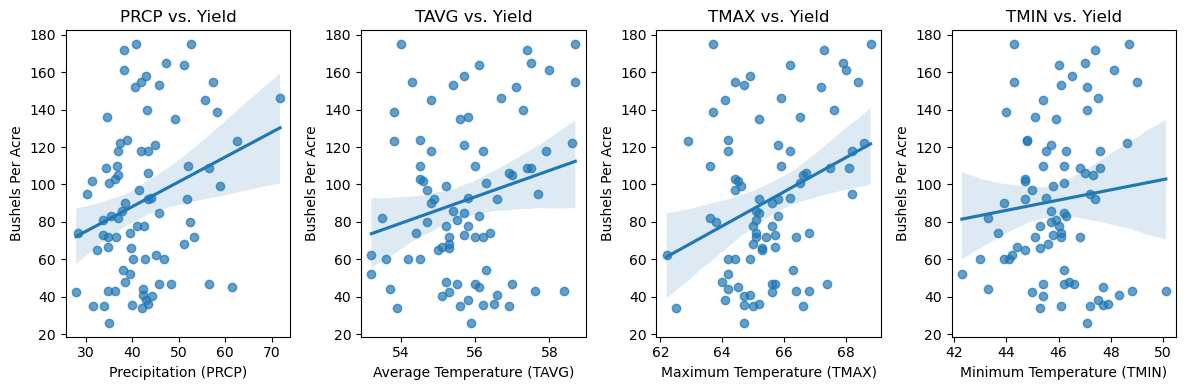

In [42]:
# Scatter plot with regression line for Precipitation (PRCP) vs. Yield
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
sns.regplot(x='PRCP', y='Bushels Per Acre', data=df, scatter_kws={'alpha':0.7})
plt.title('PRCP vs. Yield')
plt.xlabel('Precipitation (PRCP)')
plt.ylabel('Bushels Per Acre')

# Scatter plot with regression line for Average Temperature (TAVG) vs. Yield
plt.subplot(1, 4, 2)
sns.regplot(x='TAVG', y='Bushels Per Acre', data=df, scatter_kws={'alpha':0.7})
plt.title('TAVG vs. Yield')
plt.xlabel('Average Temperature (TAVG)')
plt.ylabel('Bushels Per Acre')

# Scatter plot with regression line for Maximum Temperature (TMAX) vs. Yield
plt.subplot(1, 4, 3)
sns.regplot(x='TMAX', y='Bushels Per Acre', data=df, scatter_kws={'alpha':0.7})
plt.title('TMAX vs. Yield')
plt.xlabel('Maximum Temperature (TMAX)')
plt.ylabel('Bushels Per Acre')

# Scatter plot with regression line for Minimum Temperature (TMIN) vs. Yield
plt.subplot(1, 4, 4)
sns.regplot(x='TMIN', y='Bushels Per Acre', data=df, scatter_kws={'alpha':0.7})
plt.title('TMIN vs. Yield')
plt.xlabel('Minimum Temperature (TMIN)')
plt.ylabel('Bushels Per Acre')

# Adjust layout for better readability
plt.tight_layout()

# Show the plots
plt.show()

In [43]:
# Calculate correlation matrix
correlation_matrix = df[['PRCP', 'TAVG', 'TMAX', 'TMIN', 'Bushels Per Acre']].corr()

In [44]:
# Extract correlation coefficients with respect to 'Bushels Per Acre'
correlation_with_yield = correlation_matrix['Bushels Per Acre']
print(correlation_with_yield)

PRCP                0.271586
TAVG                0.224429
TMAX                0.316755
TMIN                0.099477
Bushels Per Acre    1.000000
Name: Bushels Per Acre, dtype: float64


PRCP (Precipitation): The positive correlation coefficient (0.273794) suggests a weak positive relationship between precipitation and yield. This means that, on average, higher precipitation is associated with slightly higher yields.

TAVG (Average Temperature): The positive correlation coefficient (0.224429) indicates a weak positive relationship between average temperature and yield. This suggests that, on average, higher temperatures are associated with slightly higher yields.

TMAX (Maximum Temperature): The higher positive correlation coefficient (0.316755) suggests a moderate positive relationship between maximum temperature and yield. This implies that, on average, higher maximum temperatures are associated with moderately higher yields.

TMIN (Minimum Temperature): The positive correlation coefficient (0.103921) indicates a weak positive relationship between minimum temperature and yield. This suggests that, on average, higher minimum temperatures are associated with slightly higher yields.

## Comparing Statistics

In [45]:
# Define a threshold for high and low yields
yield_threshold = df['Bushels Per Acre'].mean()

# Create a new column indicating whether the yield is high or low
df['Yield Category'] = df['Bushels Per Acre'].apply(lambda x: 'High' if x > yield_threshold else 'Low')

# Group the data by Yield Category and calculate the average, minimum, and maximum values for each weather variable
summary_stats = df.groupby('Yield Category').agg({'PRCP': ['mean', 'min', 'max'],
                                                  'TAVG': ['mean', 'min', 'max'],
                                                  'TMAX': ['mean', 'min', 'max'],
                                                  'TMIN': ['mean', 'min', 'max']}).reset_index()
summary_stats



Yield Category       PRCP                     TAVG                   TMAX  \
                       mean    min    max       mean   min   max       mean   
0           High  44.831282  30.19  71.84  56.102564  53.8  58.7  65.969231   
1            Low  40.647442  27.91  61.39  55.434884  53.2  58.4  65.102326   

                    TMIN              
    min   max       mean   min   max  
0  62.9  68.8  46.264103  44.0  49.0  
1  62.2  67.4  45.758140  42.3  50.1

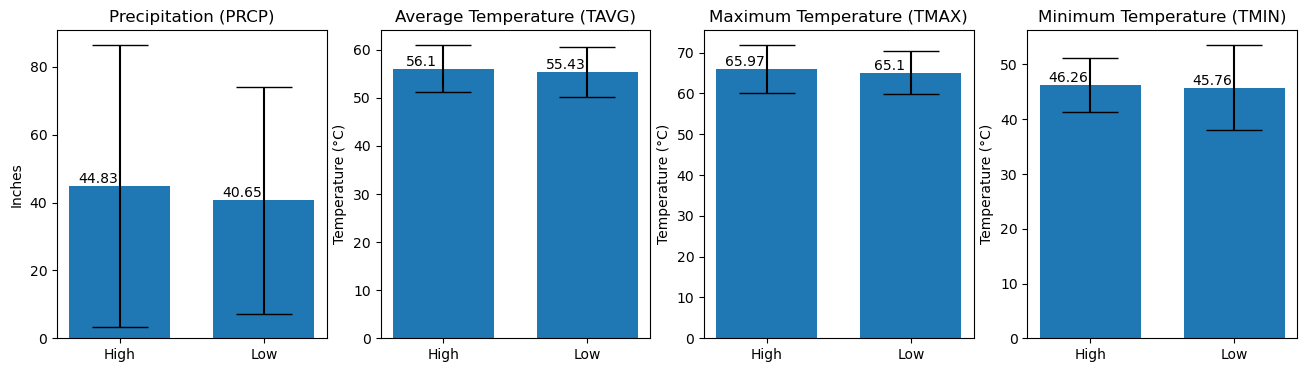

In [46]:
# Plot the summary statistics
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))


# Bar width 
bar_width = 0.7

# Plot Precipitation (PRCP)
bars = axes[0].bar(summary_stats['Yield Category'], summary_stats[('PRCP', 'mean')],
                     yerr=summary_stats[('PRCP', 'max')] - summary_stats[('PRCP', 'min')],
                     capsize=20, width=bar_width)
axes[0].set_title('Precipitation (PRCP)')
axes[0].set_ylabel('Inches')


# Display values to the left of bars
for bar in bars:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2 - 0.15, yval, round(yval, 2), ha='center', va='bottom')

# Repeat the same process for the other subplots, adjusting the text position as needed

# Plot Average Temperature (TAVG)
bars = axes[1].bar(summary_stats['Yield Category'], summary_stats[('TAVG', 'mean')],
                     yerr=summary_stats[('TAVG', 'max')] - summary_stats[('TAVG', 'min')],
                     capsize=20, width=bar_width)
axes[1].set_title('Average Temperature (TAVG)')
axes[1].set_ylabel('Temperature (°C)')

# Display values to the left of bars
for bar in bars:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2 - 0.15, yval, round(yval, 2), ha='center', va='bottom')

# Plot Maximum Temperature (TMAX)
bars = axes[2].bar(summary_stats['Yield Category'], summary_stats[('TMAX', 'mean')],
                     yerr=summary_stats[('TMAX', 'max')] - summary_stats[('TMAX', 'min')],
                     capsize=20, width=bar_width)
axes[2].set_title('Maximum Temperature (TMAX)')
axes[2].set_ylabel('Temperature (°C)')

# Display values to the left of bars
for bar in bars:
    yval = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width() / 2 - 0.15, yval, round(yval, 2), ha='center', va='bottom')

# Plot Minimum Temperature (TMIN)
bars = axes[3].bar(summary_stats['Yield Category'], summary_stats[('TMIN', 'mean')],
                     yerr=summary_stats[('TMIN', 'max')] - summary_stats[('TMIN', 'min')],
                     capsize=20, width=bar_width)
axes[3].set_title('Minimum Temperature (TMIN)')
axes[3].set_ylabel('Temperature (°C)')

# Display values to the left of bars
for bar in bars:
    yval = bar.get_height()
    axes[3].text(bar.get_x() + bar.get_width() / 2 - 0.15, yval, round(yval, 2), ha='center', va='bottom')

# Show the plots
plt.show()


- For each weather variable, you can visually compare the mean values between high and low yields.
- The error bars provide insights into the variability or spread of the data. A wider spread suggests greater variability in weather conditions for a particular yield category.
- By examining the bars and error bars across all subplots, you can identify patterns or differences in weather conditions associated with high and low crop yields.
- For instance, if the bars for a specific weather variable are notably higher for high yields compared to low yields, it may suggest a positive correlation between that weather variable and crop yield.

In [47]:
# Split the dataset into features (X) and target variable (y)
X = df[['PRCP', 'TAVG', 'TMAX', 'TMIN']]
y = df['Bushels Per Acre']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training set
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Predict yield for a new set of weather variables
new_weather_data = [[45, 57.0, 66.0, 46.5]]  # Replace with your own values
new_weather_data_scaled = scaler.transform(new_weather_data)
predicted_yield = model.predict(new_weather_data_scaled)
print(f'Predicted Yield: {predicted_yield[0]} bushels per acre')


Mean Squared Error: 1774.2151236356212
Predicted Yield: 40.408086536588165 bushels per acre


C:\Users\Kabindra\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
